In [50]:
# Importing the basic packages

import pandas as pd
import seaborn as sns
import numpy as np

import math

import matplotlib.pyplot as plt

In [51]:
# Reading the files

sales = pd.read_csv("sales.csv")

stores = pd.read_csv("stores.csv")

features = pd.read_csv("features.csv")

In [52]:
# Getting some general information about the files

sales.head(), sales.shape, sales.isna().sum()

(   Store  Dept        Date  Weekly_Sales  IsHoliday
 0      1     1  2010-02-05      24924.50      False
 1      1     1  2010-02-12      46039.49       True
 2      1     1  2010-02-19      41595.55      False
 3      1     1  2010-02-26      19403.54      False
 4      1     1  2010-03-05      21827.90      False,
 (421570, 5),
 Store           0
 Dept            0
 Date            0
 Weekly_Sales    0
 IsHoliday       0
 dtype: int64)

In [53]:
stores.head(), stores.shape, stores.isna().sum()

(   Store Type    Size
 0      1    A  151315
 1      2    A  202307
 2      3    B   37392
 3      4    A  205863
 4      5    B   34875,
 (45, 3),
 Store    0
 Type     0
 Size     0
 dtype: int64)

In [54]:
features.head(), features.shape, features.isna().sum()

(   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
 0      1  2010-02-05        42.31       2.572        NaN        NaN   
 1      1  2010-02-12        38.51       2.548        NaN        NaN   
 2      1  2010-02-19        39.93       2.514        NaN        NaN   
 3      1  2010-02-26        46.63       2.561        NaN        NaN   
 4      1  2010-03-05        46.50       2.625        NaN        NaN   
 
    MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
 0        NaN        NaN        NaN  211.096358         8.106      False  
 1        NaN        NaN        NaN  211.242170         8.106       True  
 2        NaN        NaN        NaN  211.289143         8.106      False  
 3        NaN        NaN        NaN  211.319643         8.106      False  
 4        NaN        NaN        NaN  211.350143         8.106      False  ,
 (8190, 12),
 Store              0
 Date               0
 Temperature        0
 Fuel_Price         0
 MarkDown1    

In [55]:
# Now we will merge the files

df_1 = pd.merge(features,sales, on = ["Date","Store","IsHoliday"], how="right")

df = pd.merge(df_1, stores, on = "Store", how="left")

df.head(), df.shape, 

(   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
 0      1  2010-02-05        42.31       2.572        NaN        NaN   
 1      1  2010-02-12        38.51       2.548        NaN        NaN   
 2      1  2010-02-19        39.93       2.514        NaN        NaN   
 3      1  2010-02-26        46.63       2.561        NaN        NaN   
 4      1  2010-03-05        46.50       2.625        NaN        NaN   
 
    MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Dept  \
 0        NaN        NaN        NaN  211.096358         8.106      False     1   
 1        NaN        NaN        NaN  211.242170         8.106       True     1   
 2        NaN        NaN        NaN  211.289143         8.106      False     1   
 3        NaN        NaN        NaN  211.319643         8.106      False     1   
 4        NaN        NaN        NaN  211.350143         8.106      False     1   
 
    Weekly_Sales Type    Size  
 0      24924.50    A  151315  
 1      

In [56]:
df.isna().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
dtype: int64

In [57]:
# We can eliminate the Date, Store, Dept columns

df_0 = df.drop(columns=["Store","Date","Dept"])


In [58]:
# Labeling 

from sklearn.preprocessing import LabelEncoder

df_0["IsHoliday"] = LabelEncoder().fit_transform(df_0["IsHoliday"])

df_0["Type"] = LabelEncoder().fit_transform(df_0["Type"])

In [59]:
df_0.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Type,Size
0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,24924.50,0,151315
1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,46039.49,0,151315
2,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,41595.55,0,151315
3,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,19403.54,0,151315
4,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,21827.90,0,151315


In [60]:
# Filling the NaN using KNN value

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

df_0 =imputer.fit_transform(df_0)

df_0.head(), df_0.shape


AttributeError: 'numpy.ndarray' object has no attribute 'head'

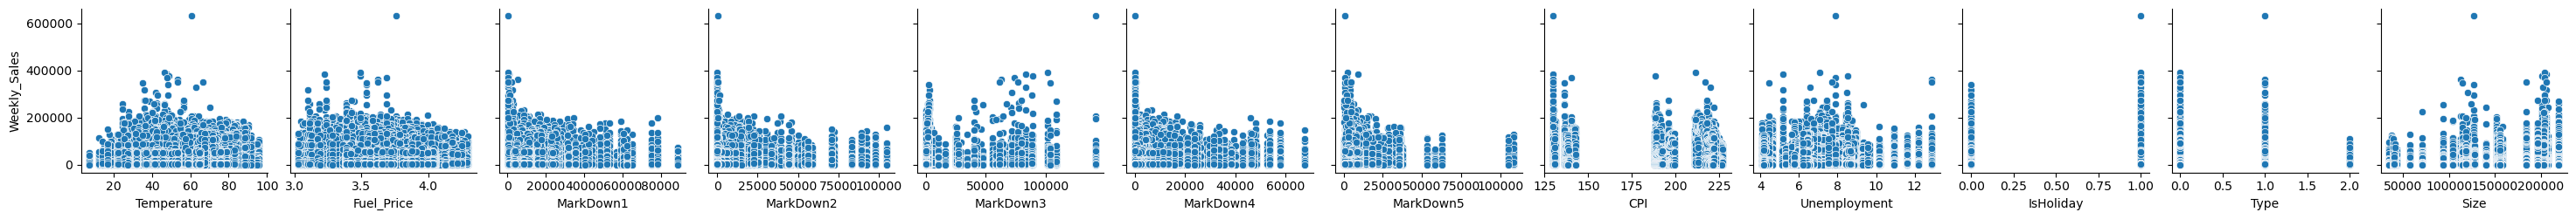

In [ ]:
# We plot to see the contribution of each independent variable to the dependent variable Weekly_Sales

Independents = []

for element in df_0.columns:
    if element != "Weekly_Sales":
        Independents.append(element)

sns.pairplot(df_0, y_vars=["Weekly_Sales"],
             x_vars=Independents)

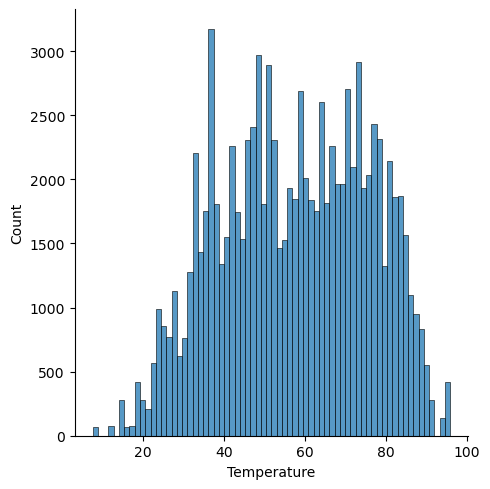

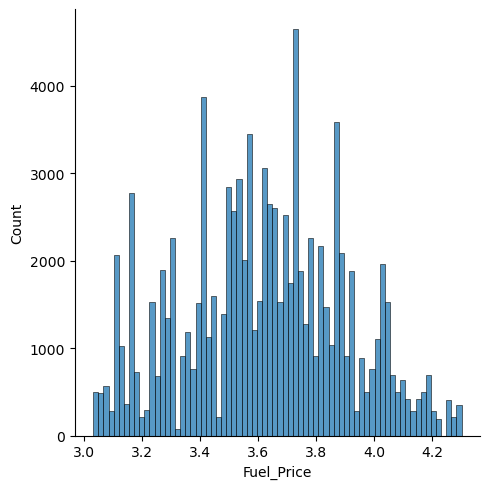

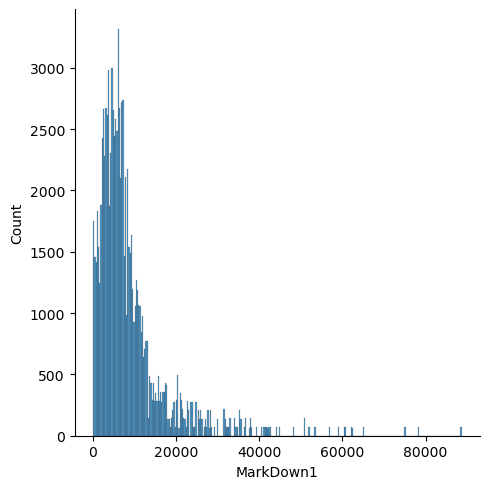

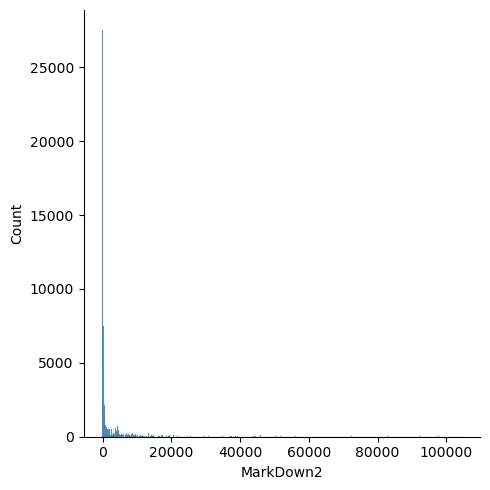

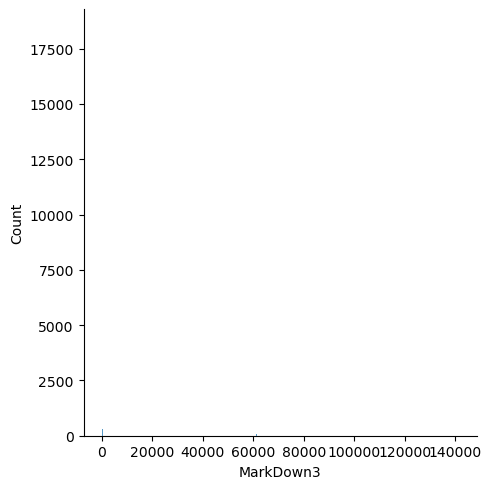

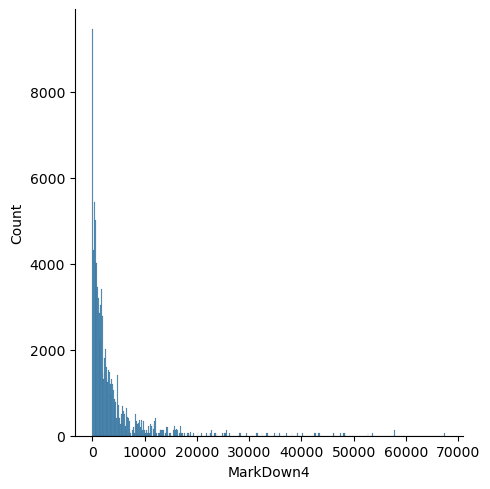

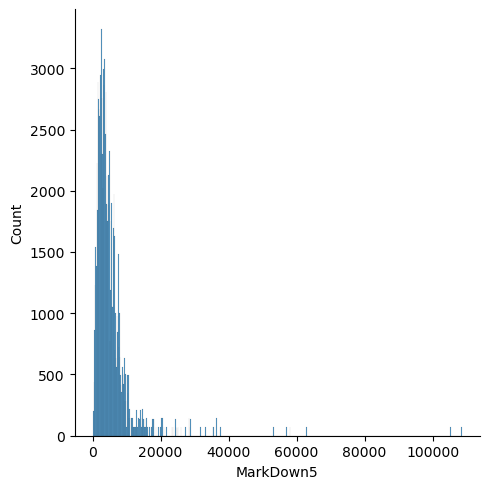

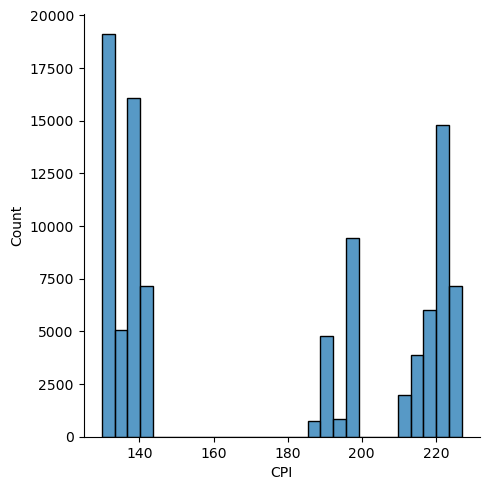

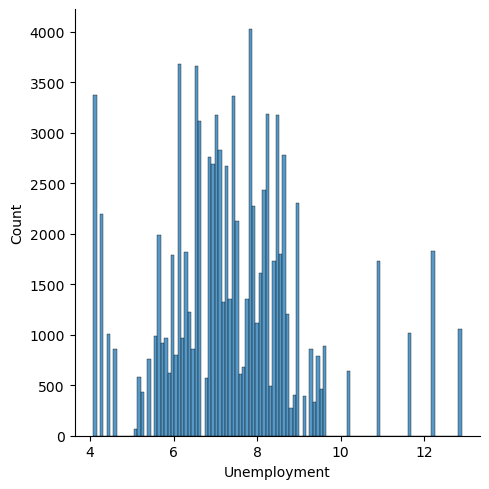

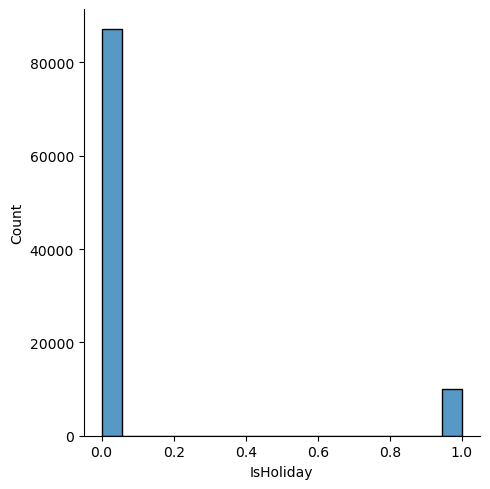

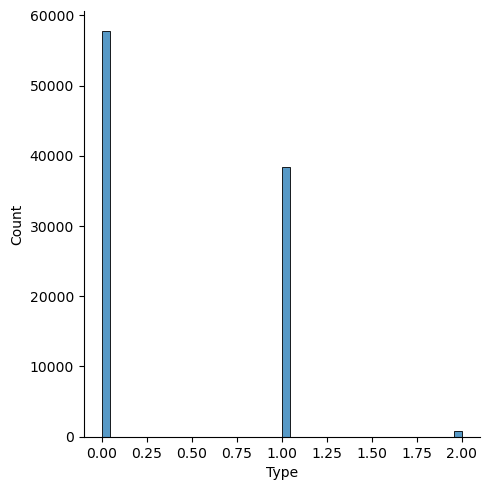

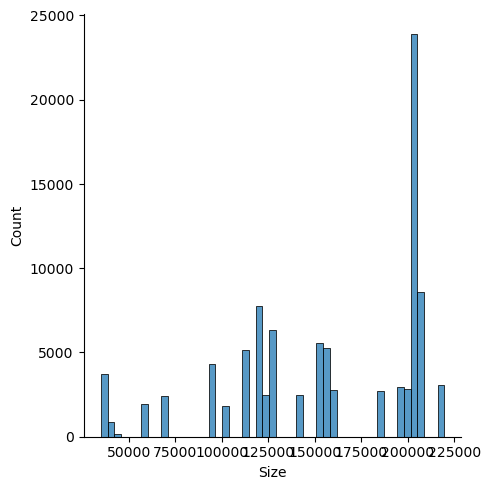

In [ ]:
# We have a look at the distribution of each variable

for element in Independents:
    sns.displot(df_0, x=element)


In [ ]:
# Evaluating the correlations between different variables 

corr_matrix = df_0.corr()

fig = plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Correlation of each independent variable with the dependent variable
corr_matrix['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.212192
MarkDown3       0.062792
MarkDown5       0.059649
MarkDown1       0.037341
MarkDown4       0.029471
MarkDown2       0.015829
IsHoliday       0.014389
Temperature     0.013029
CPI            -0.016371
Fuel_Price     -0.020557
Unemployment   -0.037735
Type           -0.174546
Name: Weekly_Sales, dtype: float64

In [ ]:
# Training and test the models (here we are not eliminating any variables)

from sklearn.model_selection import train_test_split


X = df_0.drop(columns=["Weekly_Sales"])

y = df_0["Weekly_Sales"]

X_1 = df_0.drop(columns=["Weekly_Sales", "Type"])

df_2 = df_0
outliers_list = ["Temperature", "Fuel_Price", "Unemployment","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Weekly_Sales"]

for element in outliers_list:
    q_low = df_2[element].quantile(0.1)
    q_hi  = df_2[element].quantile(0.9)
    features_filled_W_outlier = df_2[(df_2[element] >= q_low) & (df_2[element] <= q_hi)]

X_2 = df_2.drop(columns=["Weekly_Sales", "Type", "Unemployment", "CPI" ,"Fuel_Price"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle=True)

KNN: -0.1773 ± 0.0163, [-0.18392615 -0.19359823 -0.19344519 -0.15684851 -0.15883419]
Decision Tree: 0.0606 ± 0.0020, [0.06140092 0.05776709 0.05884613 0.0617946  0.06306205]
Polynomial Regression (degree 3): 0.0588 ± 0.0034, [0.0646708  0.0547534  0.05613166 0.05944319 0.05902876]
Random Forest: 0.0604 ± 0.0022, [0.06146692 0.05700718 0.05876715 0.06148088 0.06310146]
Ridge: 0.0481 ± 0.0020, [0.04910508 0.04551773 0.04884242 0.05085437 0.04608019]
Lasso: 0.0481 ± 0.0020, [0.04910466 0.04551799 0.04884253 0.05085454 0.04608006]


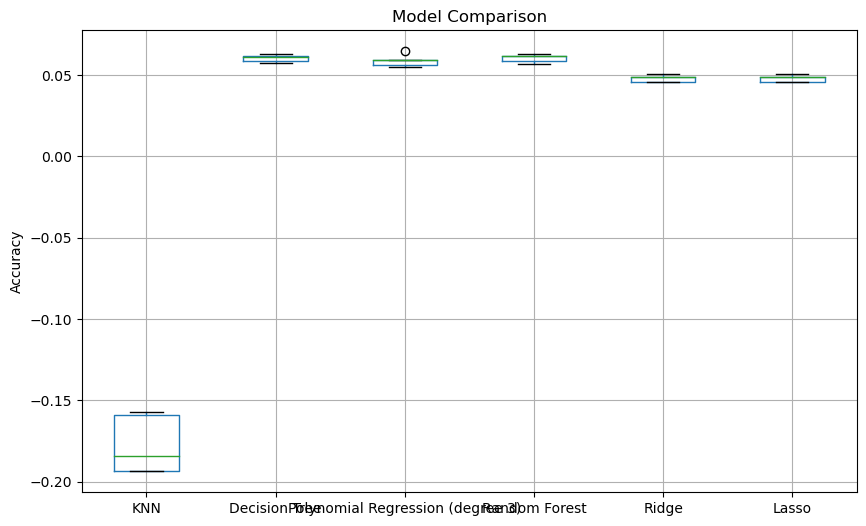

In [ ]:
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso








#poly = PolynomialFeatures(degree=4)
#X_poly = poly.fit_transform(X)


# Define models
models = {
    "KNN": KNeighborsRegressor(n_neighbors=4),
    "Decision Tree": DecisionTreeRegressor(),
    "Polynomial Regression (degree 3)": Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("linear_regression", LinearRegression())
    ]),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
    #"SVR": svm.SVR()
    #"Polynomial Regression (degree 4)": Pipeline([
        #("poly_features", PolynomialFeatures(degree=4)),
        #("linear_regression", LinearRegression())
    #])
}

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation for each model
results = {}

for name, model in models.items():
    cv_results = cross_val_score(model, X_2, y, cv=kf, scoring='r2')
    results[name] = cv_results
    print(f"{name}: {cv_results.mean():.4f} ± {cv_results.std():.4f}, {cv_results}")

# Convert results to a DataFrame for easier visualization
results_df = pd.DataFrame(results)


# Box plot to compare model performances
plt.figure(figsize=(10, 6))
results_df.boxplot()
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
results_df.head()

,KNN,Decision Tree,Polynomial Regression (degree 3),Random Forest,Ridge,Lasso
0,-0.183926,0.061401,0.064223,0.061332,0.049249,0.049248
1,-0.193598,0.057767,0.053446,0.057103,0.045495,0.045495
2,-0.193445,0.058846,0.054673,0.058444,0.048824,0.048824
3,-0.156849,0.061795,0.058455,0.061691,0.050868,0.050868
4,-0.158834,0.063062,0.057281,0.062882,0.046067,0.046067
